In [1]:
# 주요 라이브러리 import

import warnings

warnings.filterwarnings(action='ignore')

import time

from IPython.display import Image

import pandas as pd

import numpy as np

 

import matplotlib.pyplot as plt

import seaborn as sns

 

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

from sklearn.metrics import *

from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 

from sklearn import datasets

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso, ElasticNet

 

from matplotlib import rc, font_manager

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.font_manager as fm # 폰트 관련 용도

%config InlineBackend.figure_format = 'retina'

 

# 디렉토리 및 파일 이름에 맞추어 변경

#font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.

# font_location = './NanumGothic.ttf'

# font_name = fm.FontProperties(fname=font_location).get_name()

# rc('font', family=font_name)

In [2]:
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk 

In [3]:
all_files = glob.glob('./data_list/my*.xls')
all_files

['./data_list/myCabinetExcelData (4).xls',
 './data_list/myCabinetExcelData (8).xls',
 './data_list/myCabinetExcelData (9).xls',
 './data_list/myCabinetExcelData (5).xls',
 './data_list/myCabinetExcelData (2).xls',
 './data_list/myCabinetExcelData (3).xls',
 './data_list/myCabinetExcelData (1).xls',
 './data_list/myCabinetExcelData (6).xls',
 './data_list/myCabinetExcelData.xls',
 './data_list/myCabinetExcelData (7).xls']

## 파일하나를 읽어서 df에 넣음. 리스트에 누적!

In [4]:
all_files_data = [] ## [df, df, df, ~~]

In [5]:
for file in all_files:
    df = pd.read_excel(file)
    all_files_data.append(df)
len(all_files_data)

10

In [6]:
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,NaN,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,NaN,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015
3,NaN,4,Big Data and Privacy: Why Public Organizations...,"Prince, Christopher",University of Toronto Press; 1998,2017
4,NaN,5,Big data on individuals in the architectural d...,"Meekings, Scott; Schnabel, Marc Aurel",Taylor & Francis,2017
...,...,...,...,...,...,...
95,NaN,96,Big data analytics sentiment: US-China reactio...,"LaBrie, Ryan C.; Steinke, Gerhard H.; Li, Xian...","Elsevier Science B.V., Amsterdam.",2018
96,NaN,97,Big Data In the first of three articles on Big...,unknown,FENMAN LTD,2014
97,NaN,98,Big data driven lithium-ion battery modeling m...,"Li, Shuangqi; He, Hongwen; Li, Jianwei","Elsevier Science B.V., Amsterdam.",2019
98,NaN,99,Big data in multiple sclerosis: development of...,unknown,The Society,2015


In [7]:
all_files_data_concat = pd.concat(all_files_data,
                                  axis=0, #row병합
                                  ignore_index=True
                                 )
all_files_data_concat.tail(2)

,Unnamed: 0,번호,제목,저자,출판사,출판일
998,NaN,99,Assessing Whether “Big Data” Solutions Provide...,"Hertz, D.; Gavaghan, M.; Garfield, S.","Elsevier Science B.V., Amsterdam",2014
999,NaN,100,Why Big Data Is a Big Deal A new class of data...,unknown,CW COMMUNICATIONS INC.,2011


In [8]:
all_files_data_concat.describe()

,Unnamed: 0,번호,출판일
count,0.0,1000.000000,1000.000000
mean,NaN,50.500000,2015.720000
std,NaN,28.880514,3.018727
min,NaN,1.000000,1994.000000
25%,NaN,25.750000,2014.000000
50%,NaN,50.500000,2016.000000
75%,NaN,75.250000,2018.000000
max,NaN,100.000000,2020.000000


In [9]:
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          1000 non-null   int64  
 2   제목          1000 non-null   object 
 3   저자          1000 non-null   object 
 4   출판사         1000 non-null   object 
 5   출판일         1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [10]:
all_files_data_concat.drop(columns='Unnamed: 0', inplace=True)
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      1000 non-null   int64 
 1   제목      1000 non-null   object
 2   저자      1000 non-null   object
 3   출판사     1000 non-null   object
 4   출판일     1000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [11]:
all_files_data_concat.to_csv('./data_list/riss_bigdata.csv',
                             encoding='utf-8',
                             index=False)

In [12]:
df1000 = pd.read_csv('./data_list/riss_bigdata.csv', encoding='utf-8')
df1000[:3]

,번호,제목,저자,출판사,출판일
0,1,Big data promises big opportunity,"Davis, B.",INSTITUTE OF PETROLEUM,2014
1,2,Big data vs accurate data in health research: ...,"Brodie, M.A.; Pliner, E.M.; Ho, A.; Li, Kalina...","Elsevier Science B.V., Amsterdam",2018
2,3,Data stream classification and big data analytics,"Krawczyk, B.; Stefanowski, J.; Wozniak, M.","Elsevier Science B.V., Amsterdam.",2015


## 전처리

In [13]:
# 제목 추출
all_titles = df1000['제목']
all_titles

0                      Big data promises big opportunity
1      Big data vs accurate data in health research: ...
2      Data stream classification and big data analytics
3      Big Data and Privacy: Why Public Organizations...
4      Big data on individuals in the architectural d...
                             ...                        
995    Efficient data management tools for the hetero...
996    Securing Big Data Provenance for Auditors: The...
997    Demystifying big data: Anatomy of big data dev...
998    Assessing Whether “Big Data” Solutions Provide...
999    Why Big Data Is a Big Deal A new class of data...
Name: 제목, Length: 1000, dtype: object

In [14]:
stopwords = set(stopwords.words('english'))
lemma = WordNetLemmatizer() # Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.
## fly, flies, flied ==> fly

In [15]:
## 1. 글자만 추출(글자가 아닌 것은 공백으로 replace)
## 2. 분석에 사용하지 않을 글자들 제거(불용어 처리)
## 3. 표제어 추출

In [16]:
words = [] ## 전처리한 결과를 모으는 리스트

In [17]:
# for title in all_titles[0:1]:
#     ## 1. 전처리 1번: 글자가 아닌 것은 공백으로 대체
#     pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))
#     print(pre1)
#     ## 2. 소문자로 변경하여 단어를 토큰으로 마들자.
#     pre1_lower_token = word_tokenize(pre1.lower())
#     print(pre1_lower_token)
    
#     ## 3. 전처리 2번: 불용어 처리
#     # for i in pre1_lower_token:
#     #     if i in stopwords:
#     #         remove(i)
#     # print("불용어 처리 후:", pre1_lower_token)
#     pre2 = [w for w in pre1_lower_token if w not in stopwords]
#     print(pre2)
    
#     ## 4. 표제어 추출
#     pre3 = [lemma.lemmatize(w) for w in pre2]
#     print(pre3)

In [18]:
for title in all_titles:
    ## 1. 전처리 1번: 글자가 아닌 것은 공백으로 대체
    pre1 = re.sub(r"[^a-zA-Z]+", " ", str(title))
    # print(pre1)
    ## 2. 소문자로 변경하여 단어를 토큰으로 마들자.
    pre1_lower_token = word_tokenize(pre1.lower())
    # print(pre1_lower_token)
    
    ## 3. 전처리 2번: 불용어 처리
    # for i in pre1_lower_token:
    #     if i in stopwords:
    #         remove(i)
    # print("불용어 처리 후:", pre1_lower_token)
    pre2 = [w for w in pre1_lower_token if w not in stopwords]
    # print(pre2)
    
    ## 4. 표제어 추출
    pre3 = [lemma.lemmatize(w) for w in pre2]
    # print(pre3)
    words.append(pre3)
words[:2]

[['big', 'data', 'promise', 'big', 'opportunity'],
 ['big',
  'data',
  'v',
  'accurate',
  'data',
  'health',
  'research',
  'large',
  'scale',
  'physical',
  'activity',
  'monitoring',
  'smartphones',
  'wearable',
  'device',
  'risk',
  'unconscious',
  'bias']]

In [19]:
len(words)

1000

In [20]:
reduce(lambda x, y: x + y, words[:5]) #결과가 list
## 여러개의 리스트를 하나로 합하고 싶을 떄 (요약하고 싶을 때)

['big',
 'data',
 'promise',
 'big',
 'opportunity',
 'big',
 'data',
 'v',
 'accurate',
 'data',
 'health',
 'research',
 'large',
 'scale',
 'physical',
 'activity',
 'monitoring',
 'smartphones',
 'wearable',
 'device',
 'risk',
 'unconscious',
 'bias',
 'data',
 'stream',
 'classification',
 'big',
 'data',
 'analytics',
 'big',
 'data',
 'privacy',
 'public',
 'organization',
 'adopt',
 'big',
 'data',
 'big',
 'data',
 'individual',
 'architectural',
 'design',
 'process',
 'combining',
 'individual',
 'data',
 'architect',
 'toolset']

In [21]:
words2 = reduce(lambda x, y: x + y, words)
print(type(words2))

words2[:10]

<class 'list'>


['big',
 'data',
 'promise',
 'big',
 'opportunity',
 'big',
 'data',
 'v',
 'accurate',
 'data']

In [22]:
count = Counter(words2)
count

Counter({'big': 1354,
         'data': 1645,
         'promise': 13,
         'opportunity': 31,
         'v': 3,
         'accurate': 3,
         'health': 37,
         'research': 38,
         'large': 18,
         'scale': 12,
         'physical': 3,
         'activity': 2,
         'monitoring': 7,
         'smartphones': 1,
         'wearable': 2,
         'device': 10,
         'risk': 12,
         'unconscious': 1,
         'bias': 3,
         'stream': 8,
         'classification': 8,
         'analytics': 137,
         'privacy': 17,
         'public': 11,
         'organization': 3,
         'adopt': 1,
         'individual': 6,
         'architectural': 1,
         'design': 14,
         'process': 19,
         'combining': 3,
         'architect': 1,
         'toolset': 1,
         'operation': 6,
         'basis': 1,
         'benchmarking': 2,
         'grid': 3,
         'benchmark': 2,
         'd': 1,
         'ownership': 1,
         'recent': 4,
         'development

In [23]:
count.most_common(3)

[('data', 1645), ('big', 1354), ('analytics', 137)]

In [24]:
## 빈도수가 5 이하인 것은 목록에서 제거
count.most_common(2)

[('data', 1645), ('big', 1354)]

In [25]:
for one in count.most_common(2):
    print(one[1])

1645
1354


In [30]:
word_count = dict()
for word, counts in count.most_common(50):
    if counts > 30 and len(word)!=1: #30개 이상이고 한글자 아닌것 추출
        word_count[word] = counts #'data' : 1654
print(word_count)

{'data': 1645, 'big': 1354, 'analytics': 137, 'analysis': 67, 'based': 62, 'using': 57, 'science': 50, 'system': 50, 'management': 48, 'challenge': 47, 'approach': 44, 'mining': 40, 'research': 38, 'new': 38, 'health': 37, 'model': 37, 'cloud': 34, 'smart': 34, 'learning': 33, 'opportunity': 31}


In [32]:
## 너무 주제와 일치하는 단어는 dict에서 제거해버리자
del word_count['big']
del word_count['data']
word_count

{'analytics': 137,
 'analysis': 67,
 'based': 62,
 'using': 57,
 'science': 50,
 'system': 50,
 'management': 48,
 'challenge': 47,
 'approach': 44,
 'mining': 40,
 'research': 38,
 'new': 38,
 'health': 37,
 'model': 37,
 'cloud': 34,
 'smart': 34,
 'learning': 33,
 'opportunity': 31}

In [35]:
sorted_wc = sorted(word_count.values(), reverse=True)
sorted_wc

[137, 67, 62, 57, 50, 50, 48, 47, 44, 40, 38, 38, 37, 37, 34, 34, 33, 31]

<function matplotlib.pyplot.show(close=None, block=None)>

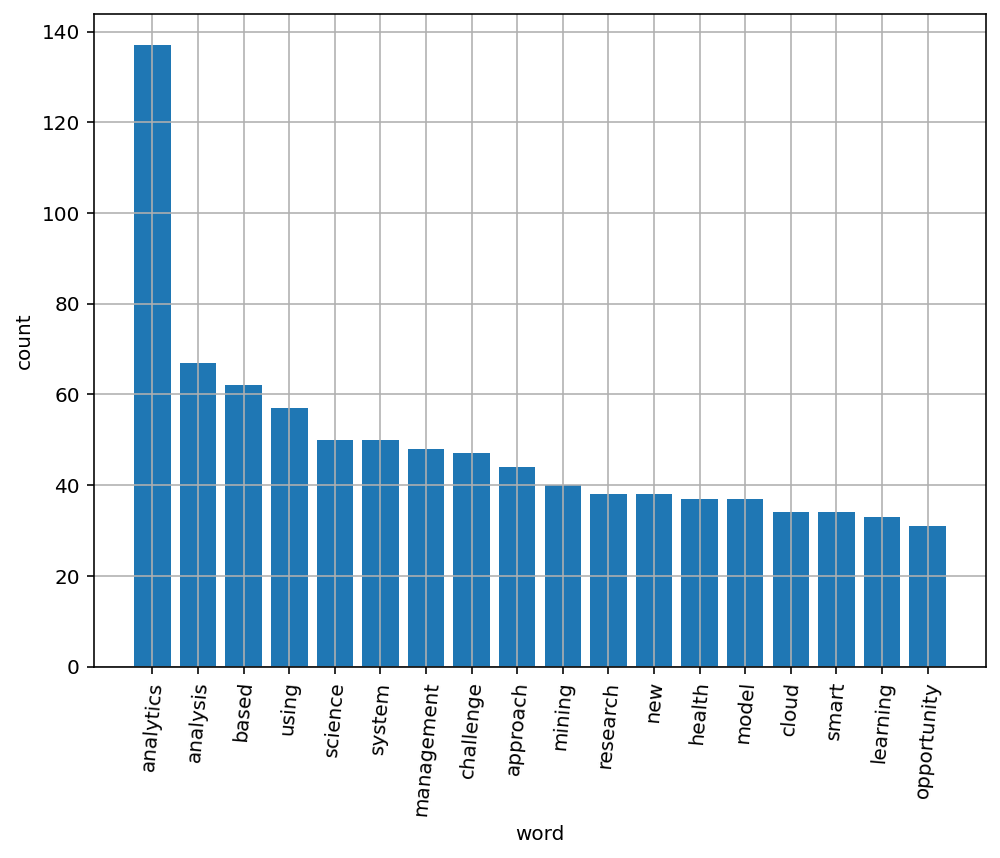

In [46]:
plt.figure(figsize=(8,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show